## Анализ данных интернет-магазине «Стримчик»

##### Цель: 

Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

#### Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинги компьютерных игр и присваивает им подходящую возрастную категорию.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import levene
import seaborn as sns
from scipy import stats as st

data = pd.read_csv('/datasets/games.csv')

In [61]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [63]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [64]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

#### Вывод

- Довольно большое кол-во пропусков
- Year_of_Release - имеет формат float, а должен быть int
- User_Score - имеет тип object, а должен быть float

#### Подготовка данных


In [65]:
#приведем наименование столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [67]:
# проведем анализ столбцов для того, чтобы понять к какому типу они отностятся
print(data['name'].unique()) # текстовый
print(data['platform'].unique()) # текстовый
print(data['genre'].unique()) # текстовый
print(data['user_score'].unique()) # float
print(data['rating'].unique()) # текстовый

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' 

- Преобразуем данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [68]:
# в user_score обнаружено TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено)
#Заменим значение "tbd" - "to be determined" на NaN
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float')

In [69]:
#Приведем годы и оценки критиков в целочисленный тип
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')

- Обработаем  пропуски

In [70]:
#Посмотрим где пропусков больше
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [71]:
#Заменим пропущенные значения на пустые строки
data.fillna(
    {"name" : " ", 
     "genre" : " "}
    , inplace=True
)

In [72]:
data['rating'] = data['rating'].fillna('no_rating')

In [73]:
# год выпуска заменю на 0 
data['year_of_release'] = data['year_of_release'].fillna(0)

In [74]:
#Добавим столбец суммырных продаж  во всех регионах и запишим их в отдельный столбец.
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [75]:
# смотрим что получилось.
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,no_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,no_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,no_rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,no_rating,0.01


#### Итоги по пропускам:

Рейтинги организации ESRB появились ранее некоторых игр, поэтому такое большое количество пропусков. Заменять их будем на «no_ rating»

Пропуски в столбцах 'critic_score' и 'user_score' (оценка критиков и оценка пользователей) не заполняются, т.к. показатели очень субъективные.

Строк с пропусками в колонках "name" и "genre" всего две. Возможно данные не указали при составлении таблицы.

Значения в колонке «оценка критиков» могли быть пропущены по технологическим причинам или по причине того, что критерии оценки на момент выхода не существовали.

Значения в колонке «оценка пользователей» могли быть пропущены по технологическим причинам , или просто не оценивалась. 


#### Исследовательский анализ данных


#### Количество игр выпущенных в разные годы

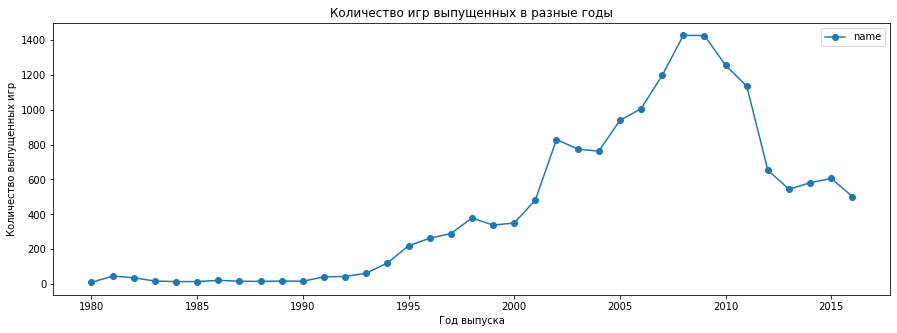

In [76]:
data.pivot_table(index= (data.query('year_of_release != 0')['year_of_release']),
               values= 'name',aggfunc='count').plot( style='o-', figsize=(15, 5))

plt.title('Количество игр выпущенных в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')

plt.show()

#### Популярные платформы

Text(0, 0.5, 'Количество продаж')

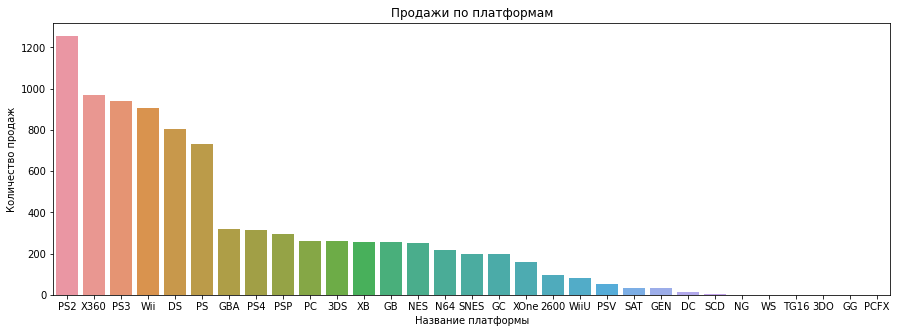

In [77]:
platform = data.pivot_table(index ='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x = platform.index, y = platform['total_sales'])
plt.title('Продажи по платформам')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')

Самыми популярными платформами за весь период (1980-2016) - это 'PS2', 'PS3', 'Wii','DS', 'PS'


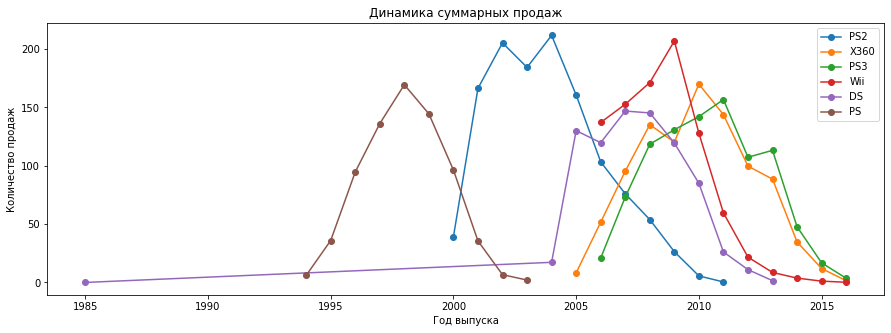

In [78]:
# Выбираем платформы с наибольшими суммарными продажами 
# смотрим распредиление по самым популярным платформам

PS2 = data[data['platform'] =='PS2'].pivot_table(index = (data.query('year_of_release != 0')['year_of_release']), values = 'total_sales',aggfunc='sum')
PS2.columns = ['PS2']
PS2 = PS2.plot(style='o-')

X360 = data[data['platform'] =='X360'].pivot_table(index = (data.query('year_of_release != 0')['year_of_release']), values = 'total_sales',aggfunc='sum')
X360.columns = ['X360']
X360 = X360.plot(ax = PS2,style='o-' )

PS3 = data[data['platform'] =='PS3'].pivot_table(index = (data.query('year_of_release != 0')['year_of_release']), values = 'total_sales',aggfunc='sum')
PS3.columns = ['PS3']
PS3 = PS3.plot(ax = PS2,style='o-' )
 
Wii = data[data['platform'] =='Wii'].pivot_table(index = (data.query('year_of_release != 0')['year_of_release']), values = 'total_sales',aggfunc='sum')
Wii.columns = ['Wii']
Wii = Wii.plot(ax = PS2,style='o-' )

DS = data[data['platform'] =='DS'].pivot_table(index = (data.query('year_of_release != 0')['year_of_release']), values = 'total_sales',aggfunc='sum')
DS.columns = ['DS']
DS = DS.plot(ax = PS2,style='o-' )

PS = data[data['platform'] =='PS'].pivot_table(index = (data.query('year_of_release != 0')['year_of_release']), values = 'total_sales',aggfunc='sum')
PS.columns = ['PS']
PS = PS.plot(ax = PS2, style='o-', figsize=(15, 5) )

plt.title('Динамика суммарных продаж')
plt.xlabel('Год выпуска')
plt.ylabel('Количество продаж')
plt.show()

Цикл жизни игровых платформ составляет от 10 до 12 лет.

Судя по графикам, популярность платформ падает вероятно из за смартфонов. 

Поскольку продажи падают по всем платформам и нет надежд на их рост, для прогноза целесообазно рассматривать период позже 2009  года. 

In [79]:
#Таблица по платформам за 2014 - 2016г.
df_pl = data[data['year_of_release'] > 2014]
df_pl.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,no_rating,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,no_rating,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,NaN,no_rating,7.39


In [80]:
tmp_groupby = df_pl.groupby(by=['platform'],as_index=False).agg({'total_sales': 'sum'}).sort_values(by=['total_sales'], ascending=False)

tmp_groupby

,platform,total_sales
3,PS4,188.15
9,XOne,86.29
0,3DS,42.92
7,WiiU,20.95
2,PS3,20.42
1,PC,13.77
8,X360,13.48
5,PSV,10.50
6,Wii,1.32
4,PSP,0.12


In [81]:
top_5_platform = df_pl[df_pl['platform'].isin(['PS4', 'XOne', '3DS', 'WiiU', 'PS3', 'PC'])]
top_5_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,no_rating,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,<NA>,NaN,no_rating,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,<NA>,NaN,no_rating,7.39


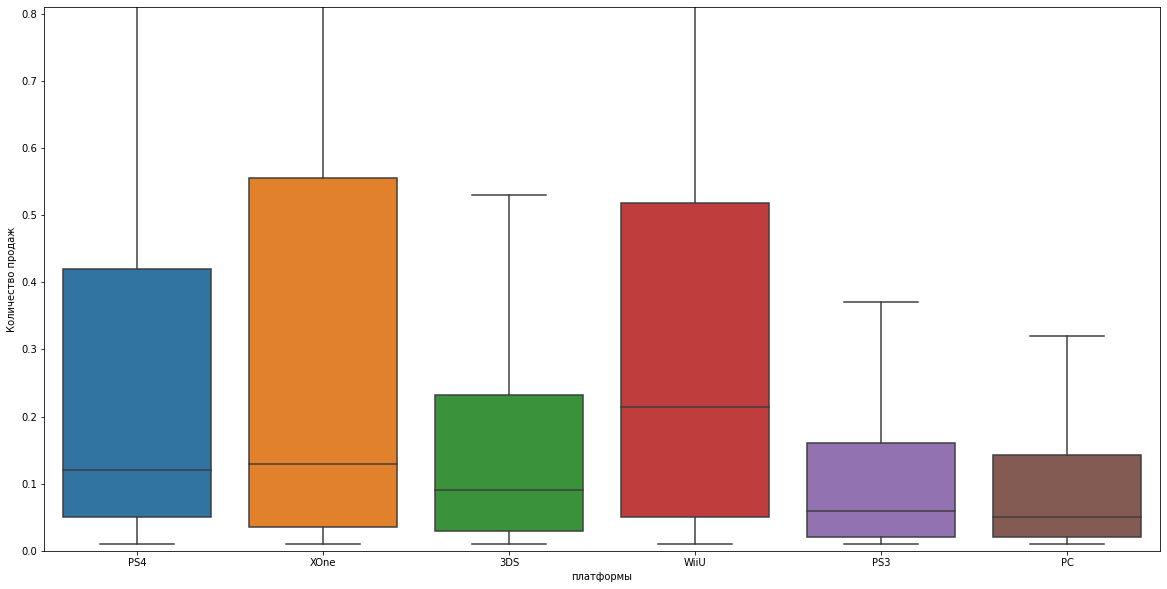

In [82]:
plt.figure(figsize=(20, 10))

sns.boxplot(data = top_5_platform , x = 'platform', y = 'total_sales',showfliers=False)

plt.xlabel('платформы')
plt.ylabel('Количество продаж')

plt.ylim(0, .81)

plt.show()

Межквартильный размах у всех разный.

Из общей картины особенно выделяются 'WiiU' и 'XOne' как платформы с наибольшими продажами. 

Широкий диапазон этих платформ нам говорит о разнообразии показателей. 

Но все-таки "ящики" у этих платформ тоже находятся в нижней части, то есть показатели здесь увы падают.

Узкий диапазон остальных платформ показывает, что показатели по продажам не сильно менялись, а их расположение ближе к нулю, что продажи постепенно сошли на нет.

In [83]:
# посмотрим также на средние значения
top_5_platform.groupby('platform')['total_sales'].describe().sort_values( by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,301.0,0.625083,1.457063,0.01,0.050,0.120,0.4200,14.63
XOne,167.0,0.516707,0.965940,0.01,0.035,0.130,0.5550,7.39
WiiU,42.0,0.498810,0.850240,0.01,0.050,0.215,0.5175,4.44
3DS,132.0,0.325152,0.798620,0.01,0.030,0.090,0.2325,7.14
PS3,111.0,0.183964,0.342696,0.01,0.020,0.060,0.1600,2.70
PC,104.0,0.132404,0.209449,0.01,0.020,0.050,0.1425,1.28


#### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

In [84]:
#платформа и отзывы пользователей.
ps4 = df_pl[df_pl['platform'] == 'PS4']
cor_with_critic_score = ps4['total_sales'].corr(ps4['critic_score'].astype('float32'))
cor_with_user_score = ps4['total_sales'].corr(ps4['user_score'])
print(f'\nКоэффицент корреляции для отзывов критиков - {cor_with_critic_score:.2f}')
print(f'\nКоэффицент корреляции для отзывов пользователей - {cor_with_user_score:.2f}')


Коэффицент корреляции для отзывов критиков - 0.39

Коэффицент корреляции для отзывов пользователей - -0.06


Линейная зависимость между продажами игр на платформе 'PS4' и отзывами пользователей практически отсутствует.

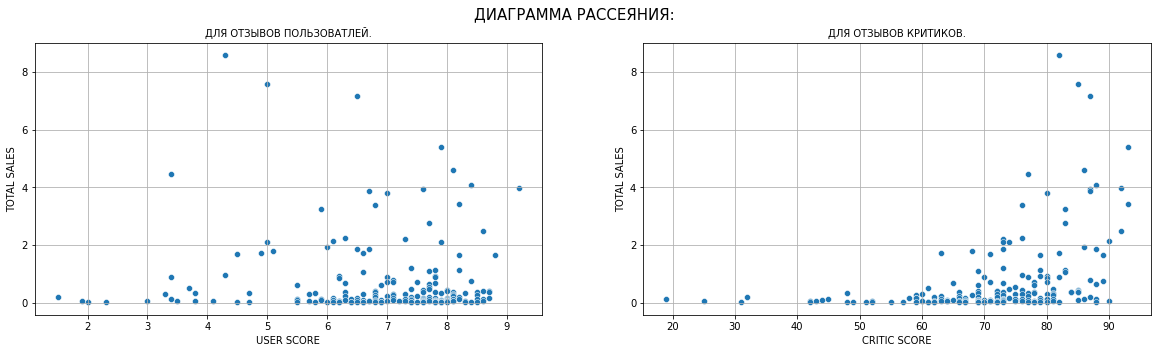

In [85]:
plt.figure(figsize=(20, 5))
plt.suptitle('ДИАГРАММА РАССЕЯНИЯ:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('ДЛЯ ОТЗЫВОВ ПОЛЬЗОВАТЛЕЙ.', fontsize=10)
sns.scatterplot(x='user_score', y='total_sales', data=ps4)
plt.ylabel('TOTAL SALES')
plt.xlabel('USER SCORE')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('ДЛЯ ОТЗЫВОВ КРИТИКОВ.', fontsize=10)
sns.scatterplot(x='critic_score', y='total_sales', data=ps4)
plt.ylabel('TOTAL SALES')
plt.xlabel('CRITIC SCORE')
plt.grid(True);

Коэффиценты корреляции для оценки критиков положительный. Отзывы оказывают влияние, умеренное. Мнение критиков имеет превосходство над мнение пользователей.

#### Соотнесем выводы с продажами игр на других платформах.

In [86]:
# Платформа XOne
xone = df_pl[df_pl['platform'] == 'XOne']
xone['user_score'].corr(xone['total_sales'])

-0.04146733387366271

In [87]:
xone['critic_score'].astype('float32').corr(xone['total_sales'])

0.43088874582136805

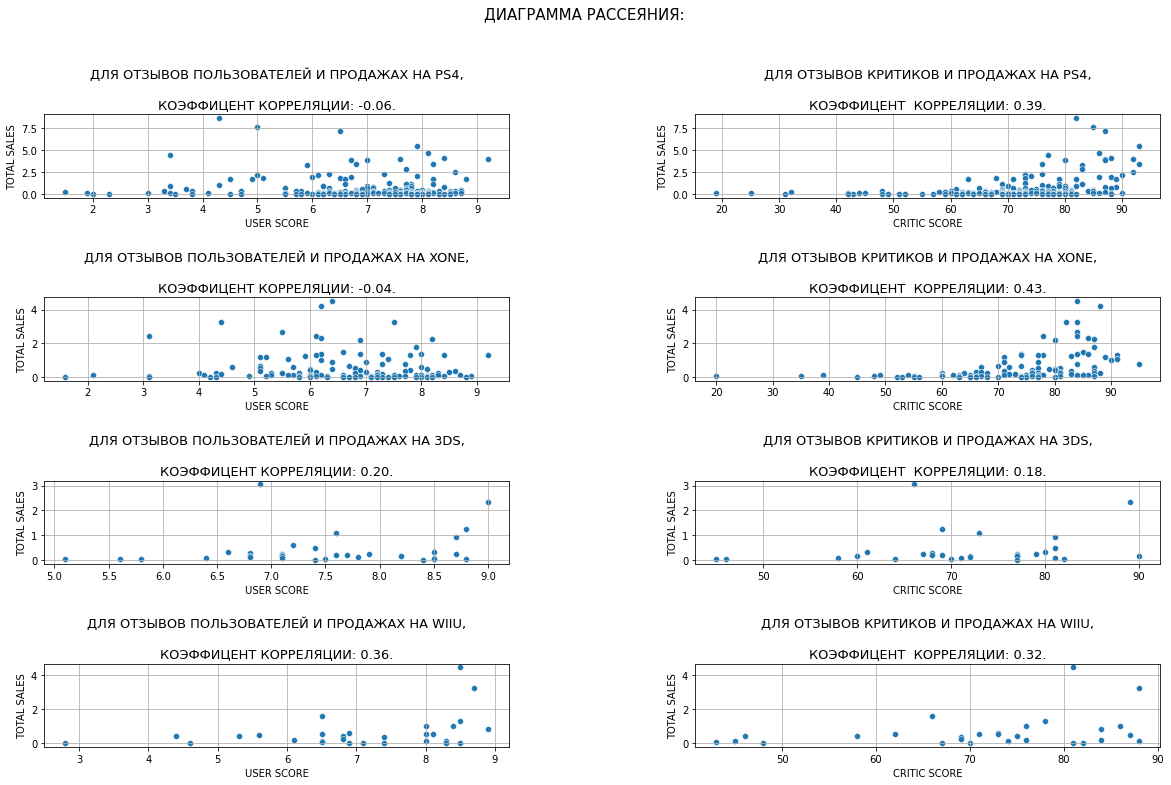

In [88]:
list_with_promising_platforms = tmp_groupby['platform'].tolist()[0:4]

position = 0
plt.figure(figsize=[20,15])
plt.subplots_adjust(wspace=0.4, hspace=1.2)
plt.suptitle('ДИАГРАММА РАССЕЯНИЯ:', fontsize=15)

for name_of_platform in list_with_promising_platforms:
    position += 1
    df_for_console = top_5_platform[(top_5_platform['platform'] == name_of_platform) & (top_5_platform['user_score'] != 0) & (top_5_platform['user_score'] != -1)]
    
    plt.subplot(5, 2, position)
    cor_with_user_score = df_for_console['total_sales'].corr(df_for_console['user_score'])
    plt.title(f'ДЛЯ ОТЗЫВОВ ПОЛЬЗОВАТЕЛЕЙ И ПРОДАЖАХ НА {name_of_platform.upper()},\n\nКОЭФФИЦЕНТ КОРРЕЛЯЦИИ: {cor_with_user_score:.2f}.', fontsize=13)
    sns.scatterplot(x='user_score', y='total_sales', data=df_for_console)
    plt.xlabel('USER SCORE')
    plt.ylabel('TOTAL SALES')
    plt.grid(True)
    
    position += 1
    plt.subplot(5, 2, position)
    cor_with_critic_score = df_for_console['total_sales'].corr(df_for_console['critic_score'].astype('float32'))
    plt.title(f'ДЛЯ ОТЗЫВОВ КРИТИКОВ И ПРОДАЖАХ НА {name_of_platform.upper()},\n\nКОЭФФИЦЕНТ  КОРРЕЛЯЦИИ: {cor_with_critic_score:.2f}.', fontsize=13)
    sns.scatterplot(x='critic_score', y='total_sales', data=df_for_console)
    plt.xlabel('CRITIC SCORE')
    plt.ylabel('TOTAL SALES')
    plt.grid(True);

Корреляция показала, что оценка пользователей не влияет на продажи.
Небольшая зависимость видна только на платформе WiiU . 
В остальных случаях она либо отсутствует совсем либо слабая.
Оценка критиков в большинстве не сильно влияет на продажи. 
Показатели в основном средние. 
На платформе 3DS слабая зависимость. 
Платформу PC изучить не удалось из за отсутствие данных.


Получается, что покупатели больше ориентируются на оценку критиков а не пользователей.

#### Общее распределение игр по жанрам

Text(0, 0.5, 'Количество продаж')

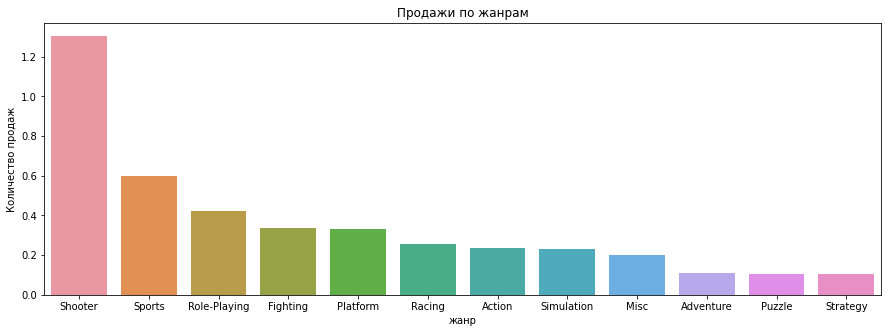

In [89]:
genre_sales = df_pl.pivot_table(index ='genre', values='total_sales', aggfunc='mean').sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x = genre_sales.index, y = genre_sales['total_sales'])
plt.title('Продажи по жанрам')
plt.xlabel('жанр')
plt.ylabel('Количество продаж')

In [90]:
genre_sales = df_pl.pivot_table(index ='genre', values='total_sales', aggfunc='mean').sort_values(by='total_sales', ascending=False)
genre_sales.head(5)

,total_sales
genre,
Shooter,1.305309
Sports,0.601215
Role-Playing,0.422879
Fighting,0.334324
Platform,0.331429


#### Выводы:

Самым популярным жанром оказался Shooter, далее идут любители спорта Sports , 

Role-Playing на третьем месте, Fighting и Platform показали одинаковые результаты.

Менее подвижные игры остались на последних рядах.

Количество игр на консолях расло с 90 до 2008 года. После появлевления игр на смартфонах, произошел спад разработок игр на игровых кончолях.

Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.

Средняя жизнь игровой платформы составляет 10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.


#### Портрет пользователя каждого региона


In [91]:
#Функция для прорисовки графиков top_in_regions_plot
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = data.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': 'red', 'eu_sales': 'gray', 'jp_sales': 'forestgreen'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

Cамые популярные платформы (топ-5)


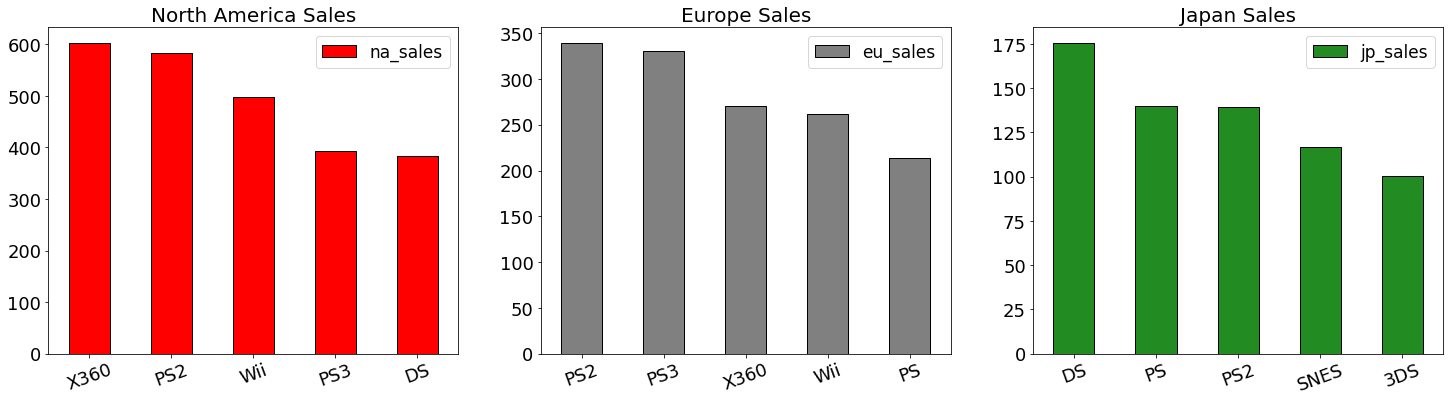

In [92]:
print ('Cамые популярные платформы (топ-5)')
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

#### Вывод

В Северной Америке имели популярность приставки поколения X360 и Wii. Немного отстает PS3. Топ-4 и топ-5 - DS и PS2 соответственно.

В Европе популярны PS3. За ней X360, Wii и DS.

В Японии, Лидер - DS. За ним 3DS и PS3.

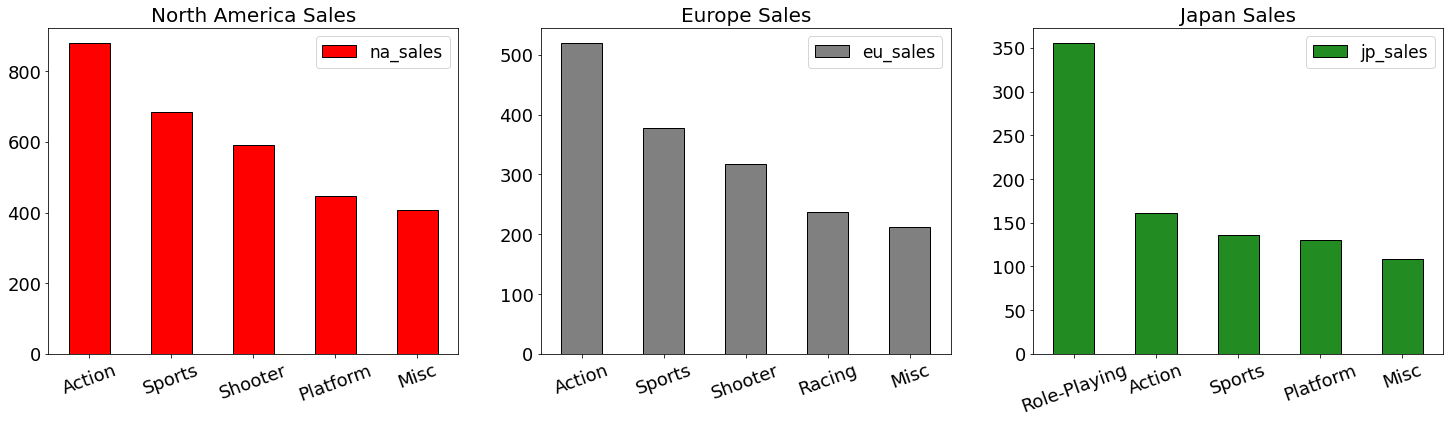

In [93]:
#Определение самых популярных жанров в заданных регионах
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)

Вкусы в Северной Америке и Европе схожи: экшены, спортивные игры и шутеры в топе. В Северной Америке больше играют в ролевые игры, в Европе же чаще выбирают гонки.

В Японии вкус совершенно иной - на первом месте ролевые игры, причем с большим отрывом. Далее экшны и спортивные игры.

In [94]:
# возрастные группы
ESRB_dict = {'E': 'Для всех','EC': '> 6 лет', 'E10+': '> 10 лет', 'M': '> 17 лет', 'T': '> 13 лет', 'AO': 'Для взрослых', 'RP': 'Рейтинг обсуждается', 'undefined': 'Не определен'}
data['ESRB_description'] = data[data['rating'].notnull()]['rating'].map(ESRB_dict)

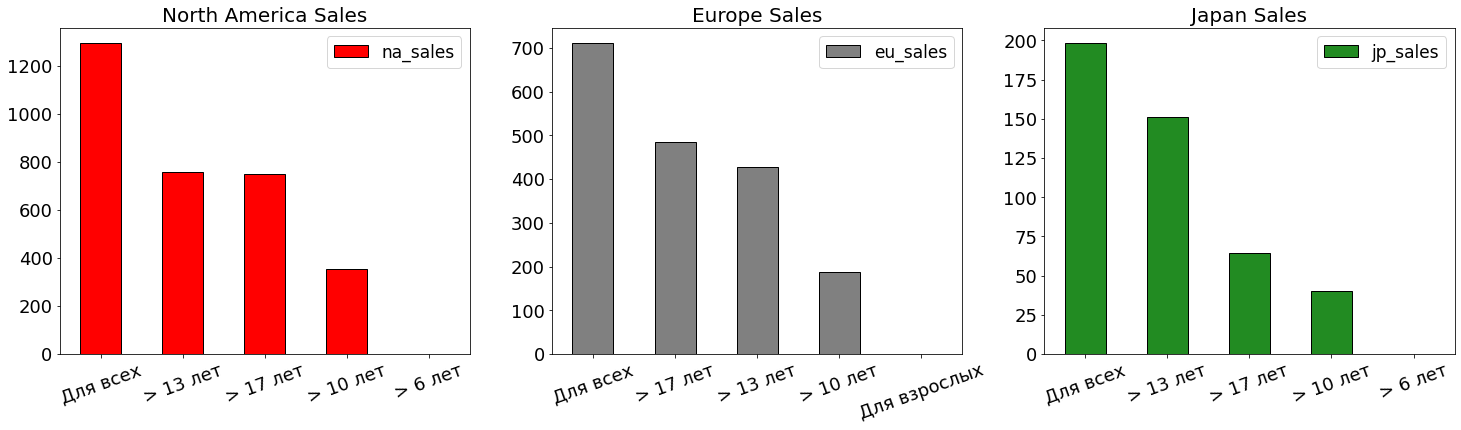

In [95]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('ESRB_description', 'na_sales', 0)
top_in_regions_plot('ESRB_description', 'eu_sales', 1)
top_in_regions_plot('ESRB_description', 'jp_sales', 2)

В Северной Америке и в Европе картина практически одинаковая. Большая часть выручки получено с игр с рейтингом "Для всех", а далее по "взрослости" игр.

##### Проверка гипотез

#### Гипотеза № 1:

средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [96]:
alpha = 0.05

xone = data[(data['platform'] == 'XOne') & (data['user_score'] > 0) & (data['year_of_release'] > 2012)]['user_score']
pc = data[(data['platform'] == 'PC') & (data['user_score'] > 0) & (data['year_of_release'] > 2012)]['user_score']

print(xone.mean())
print(pc.mean())


results = st.ttest_ind(xone, pc, equal_var = False)

print('р-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
    

6.521428571428572
6.2696774193548395
р-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


#### Вывод

Не получилось отвергнуть нулевую гипотезу.

Верно следующее утверждение: средние пользовательские рейтинги платформ Xbox One и PC одинаковые


#### Гипотеза № 2:

средние пользовательские рейтинги жанров Action и Sports разные.

Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [97]:
action = data[(data['genre'] == 'Action') & (data['user_score'] > 0) & (data['year_of_release'] > 2012)]['user_score']
sports = data[(data['genre'] == 'Sports') & (data['user_score'] > 0) & (data['year_of_release'] > 2012)]['user_score']

alpha = 0.05

results = st.ttest_ind(action, sports, equal_var = False)
print('р-значение:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


#### Вывод

Отвергаем нулевую гипотезу. 

Верное утверждение: средние пользовательские рейтинги жанров Action и Sports отличаются

#### Шаг 6. Напишите общий вывод

Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

### Общий вывод

##### Изучение и подготовка данных

Посмотрели на общую информацию о датасете, выявили пропуски и не соответствие типов данных.

Заполнили некоторые пропуски, обнаружили необычное значени tbd - "to be determined" и заменили это значение на NaN.

Многие пропуски, например в столбцах оценок мы оставили незаполненными, поскольку оценки - это субъективная характеристика качества продукта.

Посчитали общее количество продаж по всем регионам и записали результат в столбец total_sales.

##### Исследовательский анализ данных

Было обнаружено, что рост выпуска игр приходится на 1994 год, а пик на 2008-2009 гг.
Характерный срок жизни платформы - 10 лет, поэтому оставим данные с 2012 по 2016 гг.

Больше всего игр жанра Action, затем идут Sports, misc и adventure.

Лучше всего покупают игры жанра Action, Sports идёт на втором месте, Shooter неожиданно стоит на третьем месте по продажам, но при этом самый выгодный.
Adventure сильно отстаёт по продажам, хотя игр выпускается много.

##### Портрет пользователя региона

В NA самая популярная платформа X360. Европейцы предпочитают PS3. В Японии популярны DS.
В NA и EU самые популярные жанры практически совпадают. В JP вкусы отличаются.
Во всех регионах лидируют игры с рейтингом E - "Для всех". В Европе и Северной Амереке дальше идут по "старшенству". В Японии опять не так. Первое место такое же - "Для всех", а вот на втором - игры для лиц от 13 лет, далее 17+.

##### Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотеза не подтвердилась.
Средние пользовательские рейтинги жанров Action и Sports разные. Гипотеза подтвердилась!.